## Predizendo Note de games na loja da Steam

#### Nome: Luciano A S Contri
#### Matrícula: 1500596

    Banco de dados escolhido: Video Games on Steam [in JSON]
    Url: https://www.kaggle.com/datasets/sujaykapadnis/games-on-steam?select=steamdb.min.json  

#### Importando Bibliotecas a serem utilizadas

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, mean_absolute_error
import numpy as np


## Análise descritiva e preparação dos dados:

In [30]:
df = pd.read_json('steamdb.json')
df.head(10)

,sid,store_url,store_promo_url,store_uscore,published_store,published_meta,published_stsp,published_hltb,published_igdb,image,...,meta_url,meta_score,meta_uscore,grnk_score,igdb_url,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity
0,10,https://store.steampowered.com/app/10,https://www.youtube.com/watch?v=oKC9SAF4JAc,97.0,2000-11-01,2000-11-08,2000-11-01,1999-06-12,1999-06-12,https://steamcdn-a.akamaihd.net/steam/apps/10/...,...,https://www.metacritic.com/game/pc/counter-str...,88.0,92.0,NaN,https://www.igdb.com/games/counter-strike,NaN,NaN,70.0,83.0,25.74
1,20,https://store.steampowered.com/app/20,None,84.0,1999-04-01,1999-04-07,1999-04-01,1999-04-07,1999-04-07,https://steamcdn-a.akamaihd.net/steam/apps/20/...,...,https://www.metacritic.com/game/pc/team-fortre...,NaN,71.0,NaN,https://www.igdb.com/games/team-fortress-classic,NaN,NaN,NaN,70.0,1.67
2,30,https://store.steampowered.com/app/30,https://www.youtube.com/watch?v=j4MCo89bTWE,90.0,2003-05-01,2003-05-06,2003-05-01,2000-08-04,2003-05-01,https://steamcdn-a.akamaihd.net/steam/apps/30/...,...,https://www.metacritic.com/game/pc/day-of-defe...,79.0,91.0,NaN,https://www.igdb.com/games/day-of-defeat,NaN,NaN,71.0,76.0,1.45
3,40,https://store.steampowered.com/app/40,https://www.youtube.com/watch?v=jN_18uhiMS8,82.0,2001-06-01,2001-06-07,2001-06-01,2001-06-01,2001-07-01,https://steamcdn-a.akamaihd.net/steam/apps/40/...,...,https://www.metacritic.com/game/pc/deathmatch-...,NaN,68.0,NaN,https://www.igdb.com/games/deathmatch-classic,NaN,NaN,NaN,75.0,1.00
4,50,https://store.steampowered.com/app/50,https://www.youtube.com/watch?v=ZNZsWm-Ulk4,95.0,1999-11-01,1999-10-31,1999-11-01,1999-11-01,1999-11-10,https://steamcdn-a.akamaihd.net/steam/apps/50/...,...,https://www.metacritic.com/game/pc/half-life-o...,NaN,86.0,NaN,https://www.igdb.com/games/half-life-opposing-...,6.0,4.0,70.0,82.0,3.45
5,60,https://store.steampowered.com/app/60,https://www.youtube.com/watch?v=0NxAdFF0Pv0,81.0,2000-11-01,2000-11-01,2000-11-01,2000-11-01,2000-11-01,https://steamcdn-a.akamaihd.net/steam/apps/60/...,...,https://www.metacritic.com/game/pc/ricochet,NaN,68.0,NaN,https://www.igdb.com/games/ricochet,NaN,NaN,NaN,72.0,2.56
6,70,https://store.steampowered.com/app/70,https://www.youtube.com/watch?v=qobDF0w5qJc,96.0,1998-11-08,1998-11-19,1998-11-08,1998-11-19,1998-11-27,https://steamcdn-a.akamaihd.net/steam/apps/70/...,...,https://www.metacritic.com/game/pc/half-life?f...,96.0,90.0,NaN,https://www.igdb.com/games/half-life,12.0,15.0,80.0,90.0,14.82
7,80,https://store.steampowered.com/app/80,https://www.youtube.com/watch?v=cEoXkWMRD2I,90.0,2004-03-01,2004-01-03,2004-03-01,2004-03-23,2004-03-23,https://steamcdn-a.akamaihd.net/steam/apps/80/...,...,https://www.metacritic.com/game/pc/counter-str...,65.0,87.0,NaN,https://www.igdb.com/games/counter-strike-cond...,NaN,NaN,66.0,75.0,4.12
8,130,https://store.steampowered.com/app/130,https://www.youtube.com/watch?v=vdJwW_0X0Ug,90.0,2001-06-01,2001-06-11,2001-06-01,2001-06-12,2001-06-12,https://steamcdn-a.akamaihd.net/steam/apps/130...,...,https://www.metacritic.com/game/pc/half-life-b...,71.0,82.0,NaN,https://www.igdb.com/games/half-life-blue-shift,4.0,2.0,60.0,72.0,3.67
9,220,https://store.steampowered.com/app/220,https://www.youtube.com/watch?v=ID1dWN3n7q4,97.0,2004-11-16,2004-11-16,2004-11-16,2004-11-16,2004-11-16,https://steamcdn-a.akamaihd.net/steam/apps/220...,...,https://www.metacritic.com/game/pc/half-life-2...,96.0,91.0,NaN,https://www.igdb.com/games/half-life-2,14.0,28.0,91.0,91.0,23.74


#### Primeiramente precisamos testar a normaliodade da nossa variável dependente

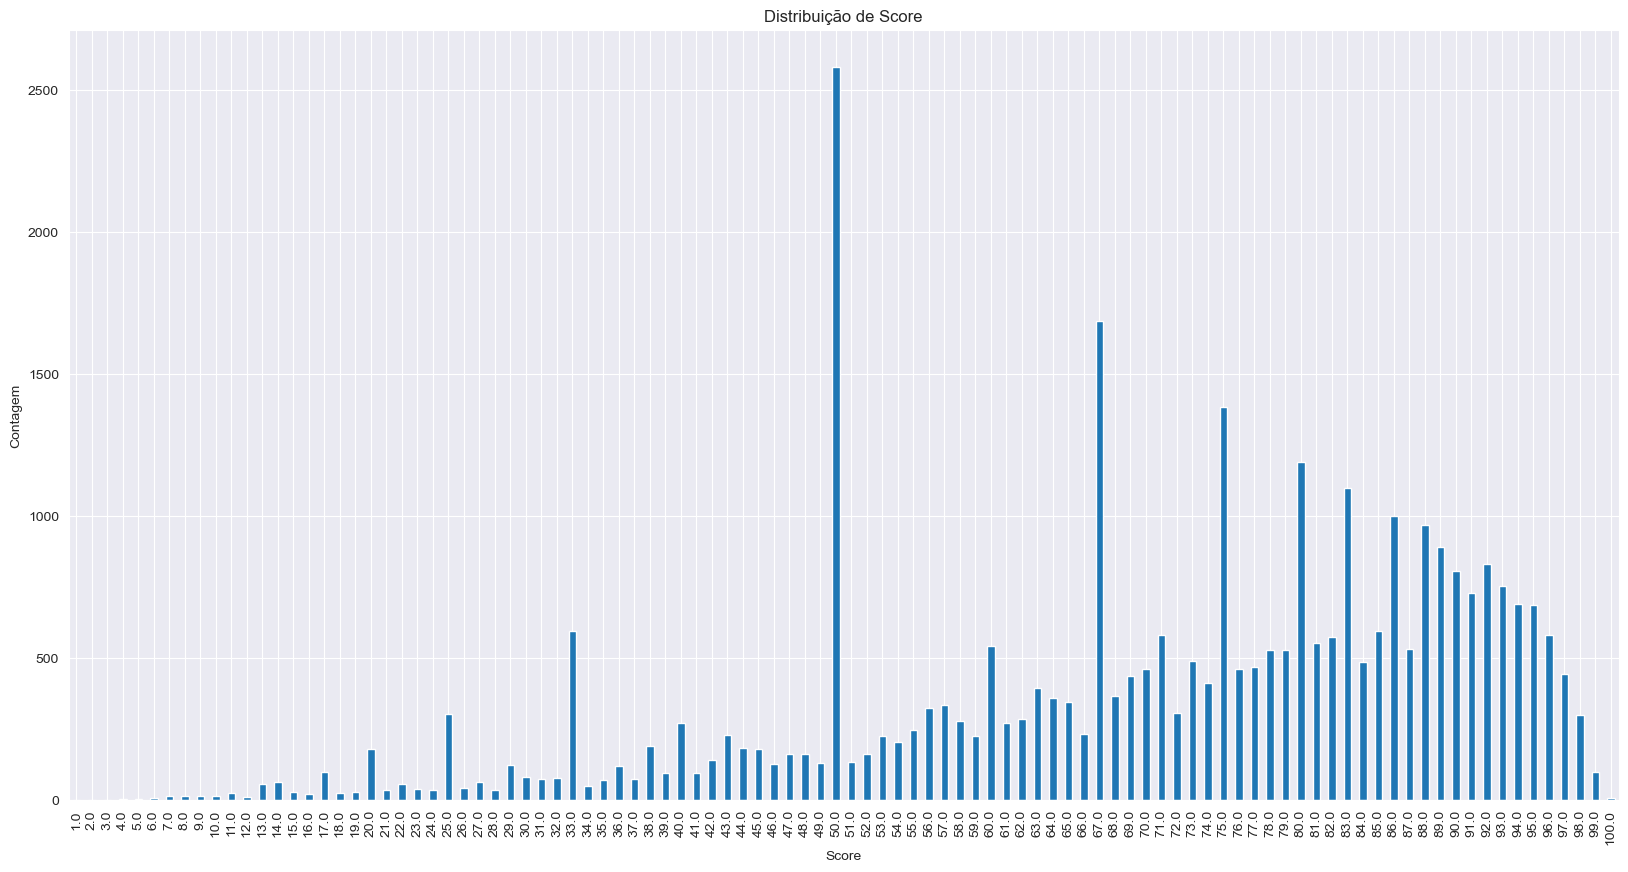

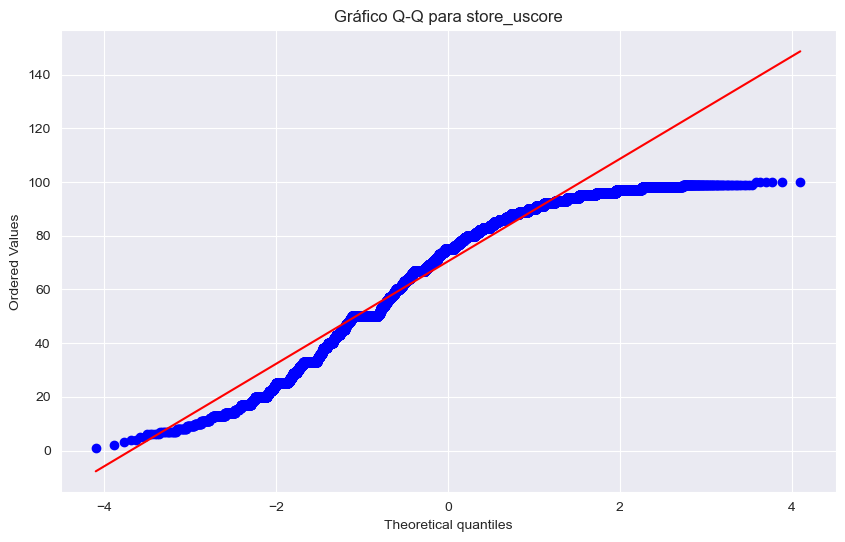

Estatísticas do teste Shapiro-Wilk: 0.9379599094390869
P-valor: 0.0


C:\Users\Lucia\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
plt.figure(figsize=(20, 10))
df['store_uscore'].dropna().value_counts().sort_index().plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.title('Distribuição de Score')
plt.show()

# Gráfico Q-Q
plt.figure(figsize=(10, 6))
stats.probplot(df['store_uscore'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico Q-Q para store_uscore')
plt.show()

# Teste de Shapiro-Wilk
stat, p = stats.shapiro(df['store_uscore'].dropna())
print('Estatísticas do teste Shapiro-Wilk:', stat)
print('P-valor:', p)

A distribuição parece ser relativamente normal e passar no teste de shapiro, mas precisamos dar cabo de outliers.

#### Corrigindo outliers:

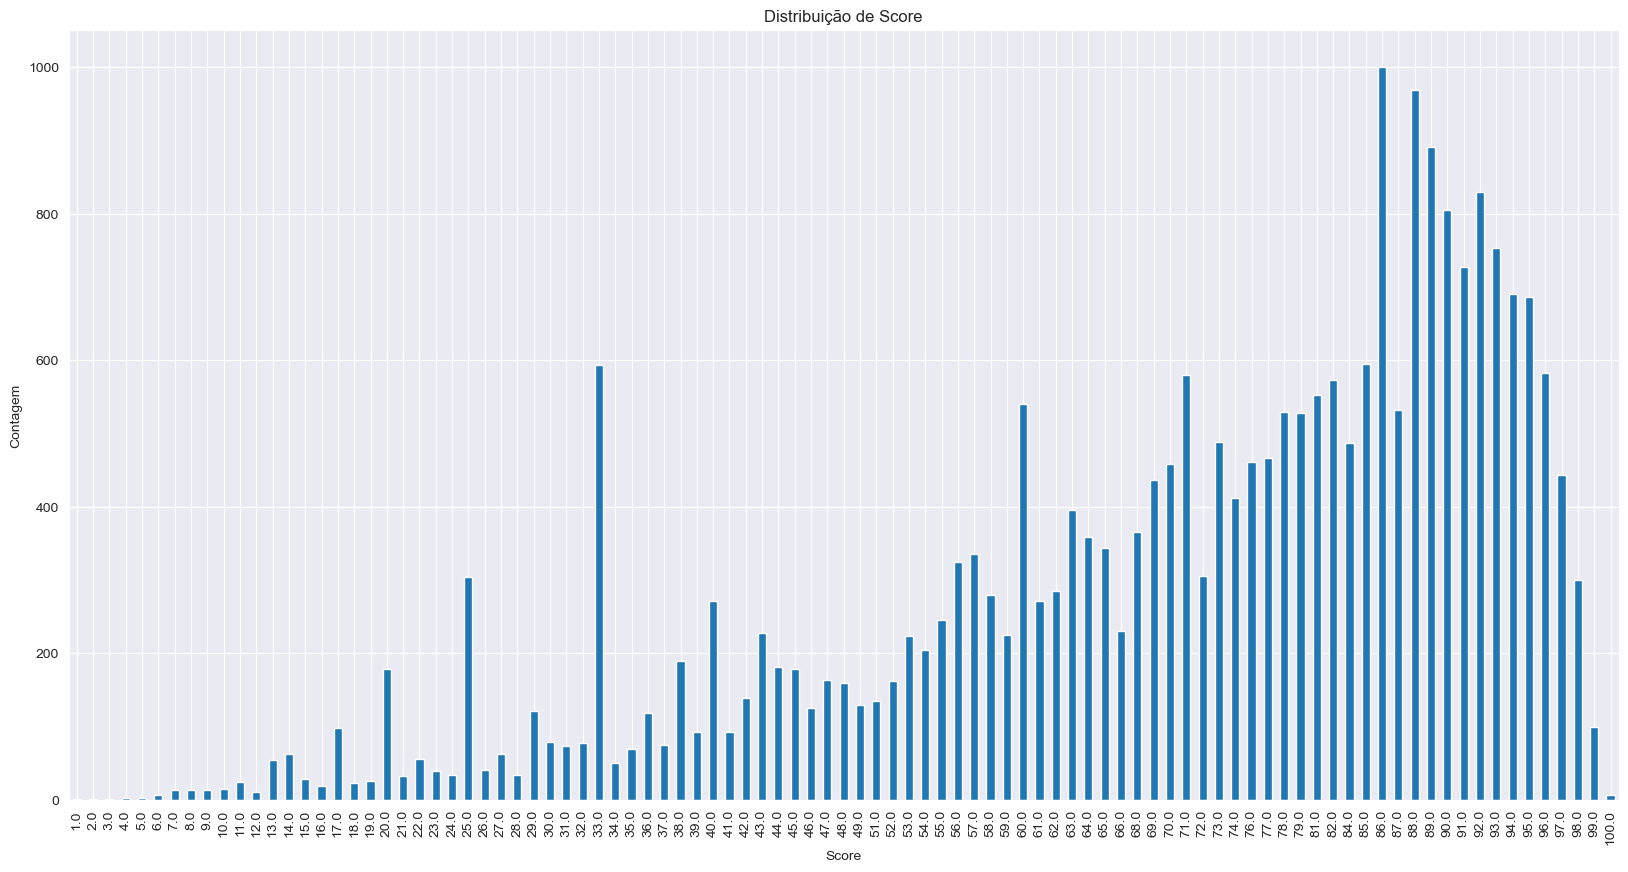

In [32]:
limite_frequencia = df['store_uscore'].value_counts().quantile(0.95)

valores_para_manter = df['store_uscore'].value_counts()[df['store_uscore'].value_counts() < limite_frequencia].index
df = df[df['store_uscore'].isin(valores_para_manter)]


plt.figure(figsize=(20, 10))
df['store_uscore'].dropna().value_counts().sort_index().plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.title('Distribuição de Score')
plt.show()


Agora apenas removendo diretamente para melhorar como o 33.

In [33]:
df = df[df['store_uscore'] != 33]


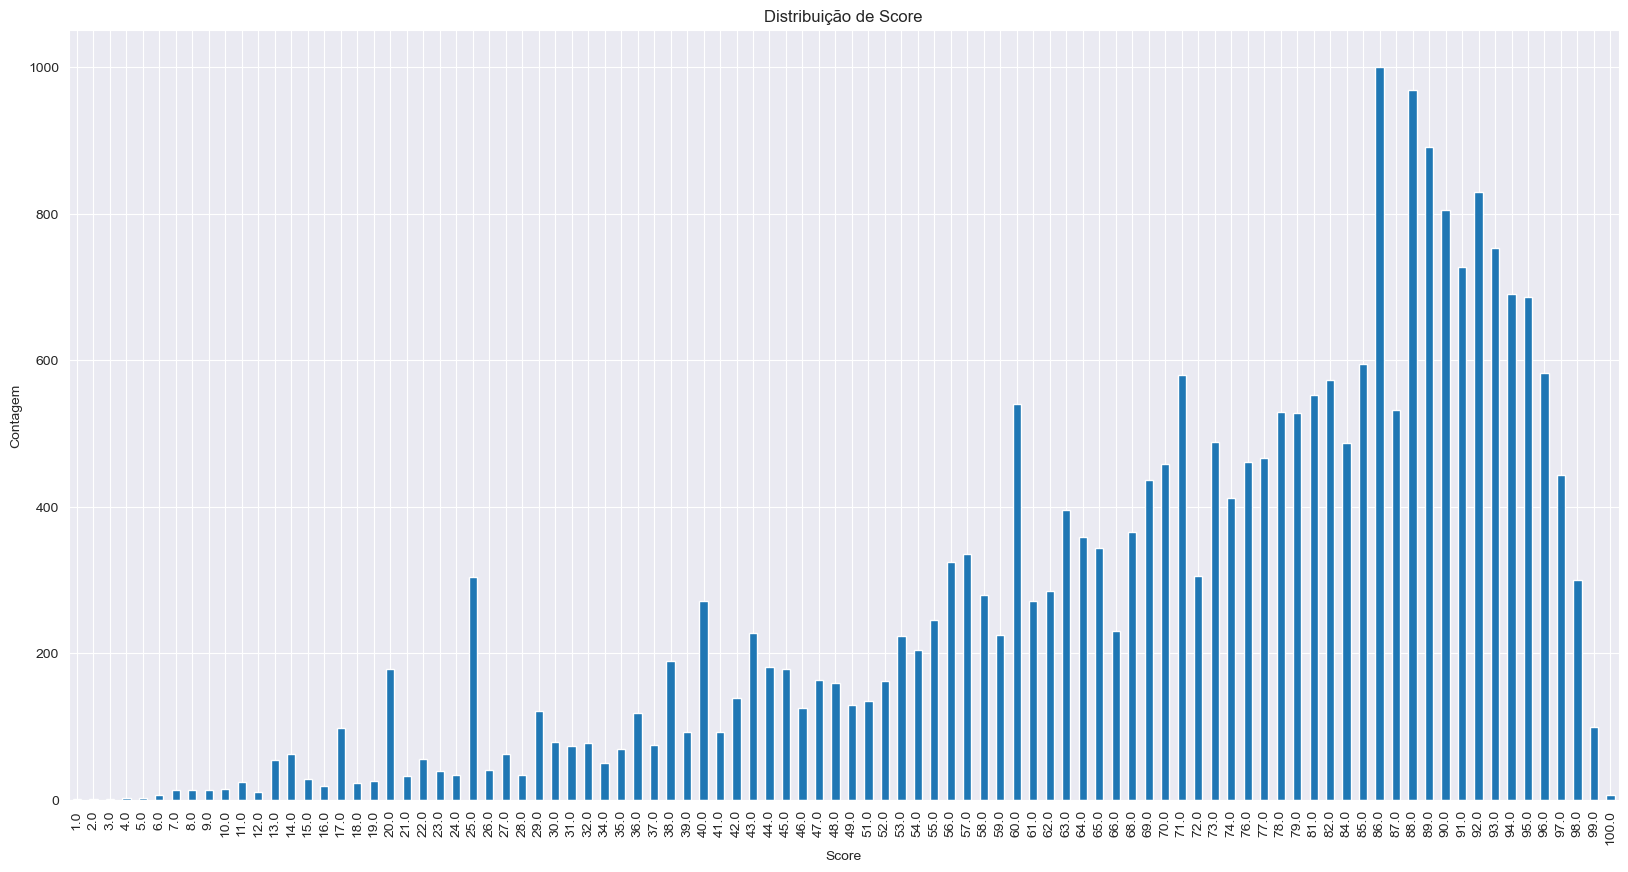

Estatísticas do teste Shapiro-Wilk: 0.9073899984359741
P-valor: 0.0


C:\Users\Lucia\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
plt.figure(figsize=(20, 10))
df['store_uscore'].dropna().value_counts().sort_index().plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.title('Distribuição de Score')
plt.show()

# Teste de Shapiro-Wilk
stat, p = stats.shapiro(df['store_uscore'].dropna())
print('Estatísticas do teste Shapiro-Wilk:', stat)
print('P-valor:', p)

##### Pronto agora sim temos uma variável normalizada, apesar

#### Tratando os tipos e colunas úteis.

In [35]:
df['published_store'] = pd.to_datetime(df['published_store'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24930 entries, 0 to 35464
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sid                     24930 non-null  int64         
 1   store_url               24930 non-null  object        
 2   store_promo_url         6416 non-null   object        
 3   store_uscore            24930 non-null  float64       
 4   published_store         24828 non-null  datetime64[ns]
 5   published_meta          23747 non-null  object        
 6   published_stsp          15619 non-null  object        
 7   published_hltb          17904 non-null  object        
 8   published_igdb          16759 non-null  object        
 9   image                   24930 non-null  object        
 10  name                    24930 non-null  object        
 11  description             24911 non-null  object        
 12  full_price              21391 non-null  float6

    A base de dados têm bastante indices nulos e colunas que não nos dão muita informação como URL do game.
    Precisamos retirar itens chave e manter itens que possam ter alguma relevância mas não tenham tantos NaN.

In [36]:
# eliminando colunas que claramente têm muitos valores nulos e pouca correlação com a variável dependente.
indices_to_drop = [0,1,2,5,6,7,8,9,10,11,14,16,17,18,19,24,26,28,30,33,36,39,40,41,42]

# Obter os nomes das colunas correspondentes aos índices
col_names_to_drop = df.columns[indices_to_drop]

# Remover as colunas
df = df.drop(columns=col_names_to_drop)
df['Idade_do_Produto'] = (datetime.now() - df['published_store']).dt.days
df = df.drop(columns= 'published_store')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24930 entries, 0 to 35464
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_uscore      24930 non-null  float64
 1   full_price        21391 non-null  float64
 2   current_price     21391 non-null  float64
 3   platforms         24930 non-null  object 
 4   categories        24892 non-null  object 
 5   genres            24930 non-null  object 
 6   tags              16773 non-null  object 
 7   achievements      14906 non-null  float64
 8   gfq_difficulty    10663 non-null  object 
 9   gfq_rating        11637 non-null  float64
 10  gfq_length        9281 non-null   float64
 11  stsp_owners       24930 non-null  float64
 12  stsp_mdntime      8284 non-null   float64
 13  hltb_single       10137 non-null  float64
 14  hltb_complete     8849 non-null   float64
 15  meta_score        3294 non-null   float64
 16  meta_uscore       5372 non-null   float6

In [38]:
df.nunique()

store_uscore           94
full_price            106
current_price         245
platforms               5
categories           3430
genres               1317
tags                13546
achievements          369
gfq_difficulty          9
gfq_rating            336
gfq_length            700
stsp_owners            13
stsp_mdntime         1401
hltb_single           123
hltb_complete         248
meta_score             74
meta_uscore            85
igdb_score             80
igdb_uscore            81
igdb_popularity       355
Idade_do_Produto     2912
dtype: int64

    Podemos observar que 'gfq_difficulty' e 'platforms' são categóricas, já as outras são ou float ou multivaloradas.

In [39]:
df['platforms'] = df['platforms'].astype('category')

#### Tratando valores nulos.

In [40]:
df.isna().sum()

store_uscore            0
full_price           3539
current_price        3539
platforms               0
categories             38
genres                  0
tags                 8157
achievements        10024
gfq_difficulty      14267
gfq_rating          13293
gfq_length          15649
stsp_owners             0
stsp_mdntime        16646
hltb_single         14793
hltb_complete       16081
meta_score          21636
meta_uscore         19558
igdb_score          20973
igdb_uscore         13732
igdb_popularity      8077
Idade_do_Produto      102
dtype: int64

    precisamos retirar todos os valores nulos da variável dependente antes de prosseguir com as demais.

In [41]:
df = df.dropna(subset='store_uscore')
print(df.isna().sum())
print(df.shape)
print(df.dropna().shape)

store_uscore            0
full_price           3539
current_price        3539
platforms               0
categories             38
genres                  0
tags                 8157
achievements        10024
gfq_difficulty      14267
gfq_rating          13293
gfq_length          15649
stsp_owners             0
stsp_mdntime        16646
hltb_single         14793
hltb_complete       16081
meta_score          21636
meta_uscore         19558
igdb_score          20973
igdb_uscore         13732
igdb_popularity      8077
Idade_do_Produto      102
dtype: int64
(24930, 21)
(982, 21)


    Podemos observar que retirando todos valores nulos, nosso dataset cai muito, podemos tentar preencher com a média os valores em float.

In [42]:
# Lista de colunas do tipo float64 para substituir NaNs pela média
colunas_float64 = ['full_price', 'current_price', 'achievements', 'gfq_rating',
                   'gfq_length', 'stsp_owners', 'stsp_mdntime', 'hltb_single',
                   'hltb_complete', 'meta_score', 'meta_uscore', 'igdb_score',
                   'igdb_uscore', 'igdb_popularity', 'Idade_do_Produto']

# Substituindo NaNs por médias nas colunas especificadas
for coluna in colunas_float64:
    media = df[coluna].mean()
    df[coluna] = df[coluna].fillna(media)
print(df.isna().sum())
print(df.shape)
print(df.dropna().shape)

store_uscore            0
full_price              0
current_price           0
platforms               0
categories             38
genres                  0
tags                 8157
achievements            0
gfq_difficulty      14267
gfq_rating              0
gfq_length              0
stsp_owners             0
stsp_mdntime            0
hltb_single             0
hltb_complete           0
meta_score              0
meta_uscore             0
igdb_score              0
igdb_uscore             0
igdb_popularity         0
Idade_do_Produto        0
dtype: int64
(24930, 21)
(9184, 21)


Já melhorou bastante mas como categories, genres e tags são multivalorados com interseção entre si podemos ao expandi-los tornar todos tags com colunas unicas booleanas excluindo as 3, portanto precisamos tratar apenas gfq_difficulty.

In [43]:
df['gfq_difficulty'].value_counts()

Just Right           3784
Just Right-Tough     1885
Tough                1688
Easy-Just Right      1128
Easy                  858
Simple                494
Tough-Unforgiving     368
Simple-Easy           281
Unforgiving           177
Name: gfq_difficulty, dtype: int64

Podemos considerar que "Simple" é o nível de dificuldade mais baixo, seguido por "Easy", "Just Right" como um nível intermediário, "Tough" como mais difícil e "Unforgiving" como o mais difícil.
    
Com isso podemos categorizar a coluna gfq_difficulty em um float de 1 a 9:
1 - Simple
2 - Simple-Easy
3 - Easy
4 - Easy-Just Right
5 - Just Right
6 - Just Right-Tough
7 - Tough
8 - Tough-Unforgiving
9 - Unforgiving

In [44]:
mapeamento_dificuldade = {
    "Simple": 1,
    "Simple-Easy": 2,
    "Easy": 3,
    "Easy-Just Right": 4,
    "Just Right": 5,
    "Just Right-Tough": 6,
    "Tough": 7,
    "Tough-Unforgiving": 8,
    "Unforgiving": 9
}

# Aplicando o mapeamento à coluna gfq_difficulty
df['gfq_difficulty'] = df['gfq_difficulty'].map(mapeamento_dificuldade)
df['gfq_difficulty'].head()

0    6.0
1    6.0
2    6.0
3    6.0
4    5.0
Name: gfq_difficulty, dtype: float64

Com isso agora podemos inferir a média nos índices faltantes.

In [45]:
media = round(df['gfq_difficulty'].mean())
df['gfq_difficulty'] = df['gfq_difficulty'].fillna(media)
print(df.isna().sum())
print(df.shape)
print(df.dropna().shape)

store_uscore           0
full_price             0
current_price          0
platforms              0
categories            38
genres                 0
tags                8157
achievements           0
gfq_difficulty         0
gfq_rating             0
gfq_length             0
stsp_owners            0
stsp_mdntime           0
hltb_single            0
hltb_complete          0
meta_score             0
meta_uscore            0
igdb_score             0
igdb_uscore            0
igdb_popularity        0
Idade_do_Produto       0
dtype: int64
(24930, 21)
(16750, 21)


 Tudo certo, agora vamos para as multivaloradas como podemos ver embaixo.

In [46]:
df['genres'].unique()

array(['Action', 'Action,Free to Play', 'Action,Free to Play,Strategy',
       ...,
       'Free to Play,Massively Multiplayer,RPG,Simulation,Sports,Strategy',
       'Action,Casual,Indie,RPG,Simulation,Early Access',
       'Casual,Free to Play,Indie,Racing,Simulation,Sports'], dtype=object)

    As colunas ['tags', 'categories', 'genres'] são multivaloradas, para analisarmos cada item
    precisamos expandir em mais colunas.

In [47]:
df['categories'] = df['categories'].apply(lambda x: x.split(',') if x is not None else [])
df['genres'] = df['genres'].apply(lambda x: x.split(',') if x is not None else [])
df['tags'] = df['tags'].apply(lambda x: x.split(',') if x is not None else [])
df.head()

,store_uscore,full_price,current_price,platforms,categories,genres,tags,achievements,gfq_difficulty,gfq_rating,...,stsp_owners,stsp_mdntime,hltb_single,hltb_complete,meta_score,meta_uscore,igdb_score,igdb_uscore,igdb_popularity,Idade_do_Produto
0,97.0,999.0,999.0,"WIN,MAC,LNX","[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],"[Action, FPS, Multiplayer, Shooter, Classic, T...",65.174561,6.0,3.90,...,15000000.0,200.0,8.979678,24.014352,88.000000,92.0,70.00000,83.0,25.74,8437.0
1,84.0,499.0,499.0,"WIN,MAC,LNX","[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],"[Action, FPS, Multiplayer, Classic, Shooter, C...",65.174561,6.0,3.47,...,3500000.0,20.0,8.979678,24.014352,71.584699,71.0,70.55067,70.0,1.67,9017.0
2,90.0,499.0,499.0,"WIN,MAC,LNX","[Multi-player, Valve Anti-Cheat enabled]",[Action],"[FPS, World War II, Multiplayer, Action, Shoot...",65.174561,6.0,3.69,...,7500000.0,28.0,8.979678,24.014352,79.000000,91.0,71.00000,76.0,1.45,7526.0
3,82.0,499.0,499.0,"WIN,MAC,LNX","[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],"[Action, FPS, Multiplayer, Classic, Shooter, F...",65.174561,6.0,3.15,...,7500000.0,11.0,8.979678,24.014352,71.584699,68.0,70.55067,75.0,1.00,8225.0
4,95.0,499.0,499.0,"WIN,MAC,LNX","[Single-player, Multi-player, Valve Anti-Cheat...",[Action],"[FPS, Action, Sci-fi, Singleplayer, Classic, S...",65.174561,5.0,3.88,...,7500000.0,235.0,5.000000,7.000000,71.584699,86.0,70.00000,82.0,3.45,8803.0


    Claramente alguns itens de cada tabela se sobrepõe, o quê criaria redundância, então temos que trablhar com conjuntos.

In [48]:
# Instanciar o MultiLabelBinarizer para fazer o one-hot encoding
combined_labels = df.apply(lambda x: set(x['categories'] + x['genres'] + x['tags']), axis=1)

# Instanciar o MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Aplicar o one-hot encoding
combined_encoded = pd.DataFrame(mlb.fit_transform(combined_labels), columns=mlb.classes_, index=df.index)

# Concatenar com o DataFrame original
df_encoded = pd.concat([df, combined_encoded], axis=1)


    Agora com essas colunas criadas foi observado 2 colunas com nomes ligeiramente diferentes mas que também são redundantes além de podermos excluir as originais 'tags', 'categories' e 'genres'.

In [49]:
df_encoded['Multi'] = df_encoded['Multi-player'] | df_encoded['Multiplayer']
df_encoded = df_encoded.drop(columns=['Multiplayer', 'Multi-player','tags', 'categories', 'genres'])
print(df_encoded.info())
print(df_encoded.shape)
print(df_encoded.dropna().shape)
df_encoded = df_encoded.dropna()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24930 entries, 0 to 35464
Columns: 394 entries, store_uscore to Multi
dtypes: category(1), float64(17), int32(376)
memory usage: 39.2 MB
None
(24930, 394)
(24930, 394)


,store_uscore,full_price,current_price,platforms,achievements,gfq_difficulty,gfq_rating,gfq_length,stsp_owners,stsp_mdntime,...,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,Multi
0,97.0,999.0,999.0,"WIN,MAC,LNX",65.174561,6.0,3.90,64.5,15000000.0,200.0,...,0,0,0,0,0,0,0,0,1,1
1,84.0,499.0,499.0,"WIN,MAC,LNX",65.174561,6.0,3.47,50.6,3500000.0,20.0,...,0,0,0,0,0,0,0,0,0,1
2,90.0,499.0,499.0,"WIN,MAC,LNX",65.174561,6.0,3.69,53.1,7500000.0,28.0,...,0,0,0,0,0,1,0,0,0,1
3,82.0,499.0,499.0,"WIN,MAC,LNX",65.174561,6.0,3.15,2.9,7500000.0,11.0,...,0,0,0,0,0,0,0,0,0,1
4,95.0,499.0,499.0,"WIN,MAC,LNX",65.174561,5.0,3.88,10.7,7500000.0,235.0,...,0,0,0,0,0,0,0,0,0,1


Preservados quase todos os indices da tabela agora podemos seguir adiante.

## Análise de correlação

C:\Users\Lucia\AppData\Local\Temp\ipykernel_11672\1707610482.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()


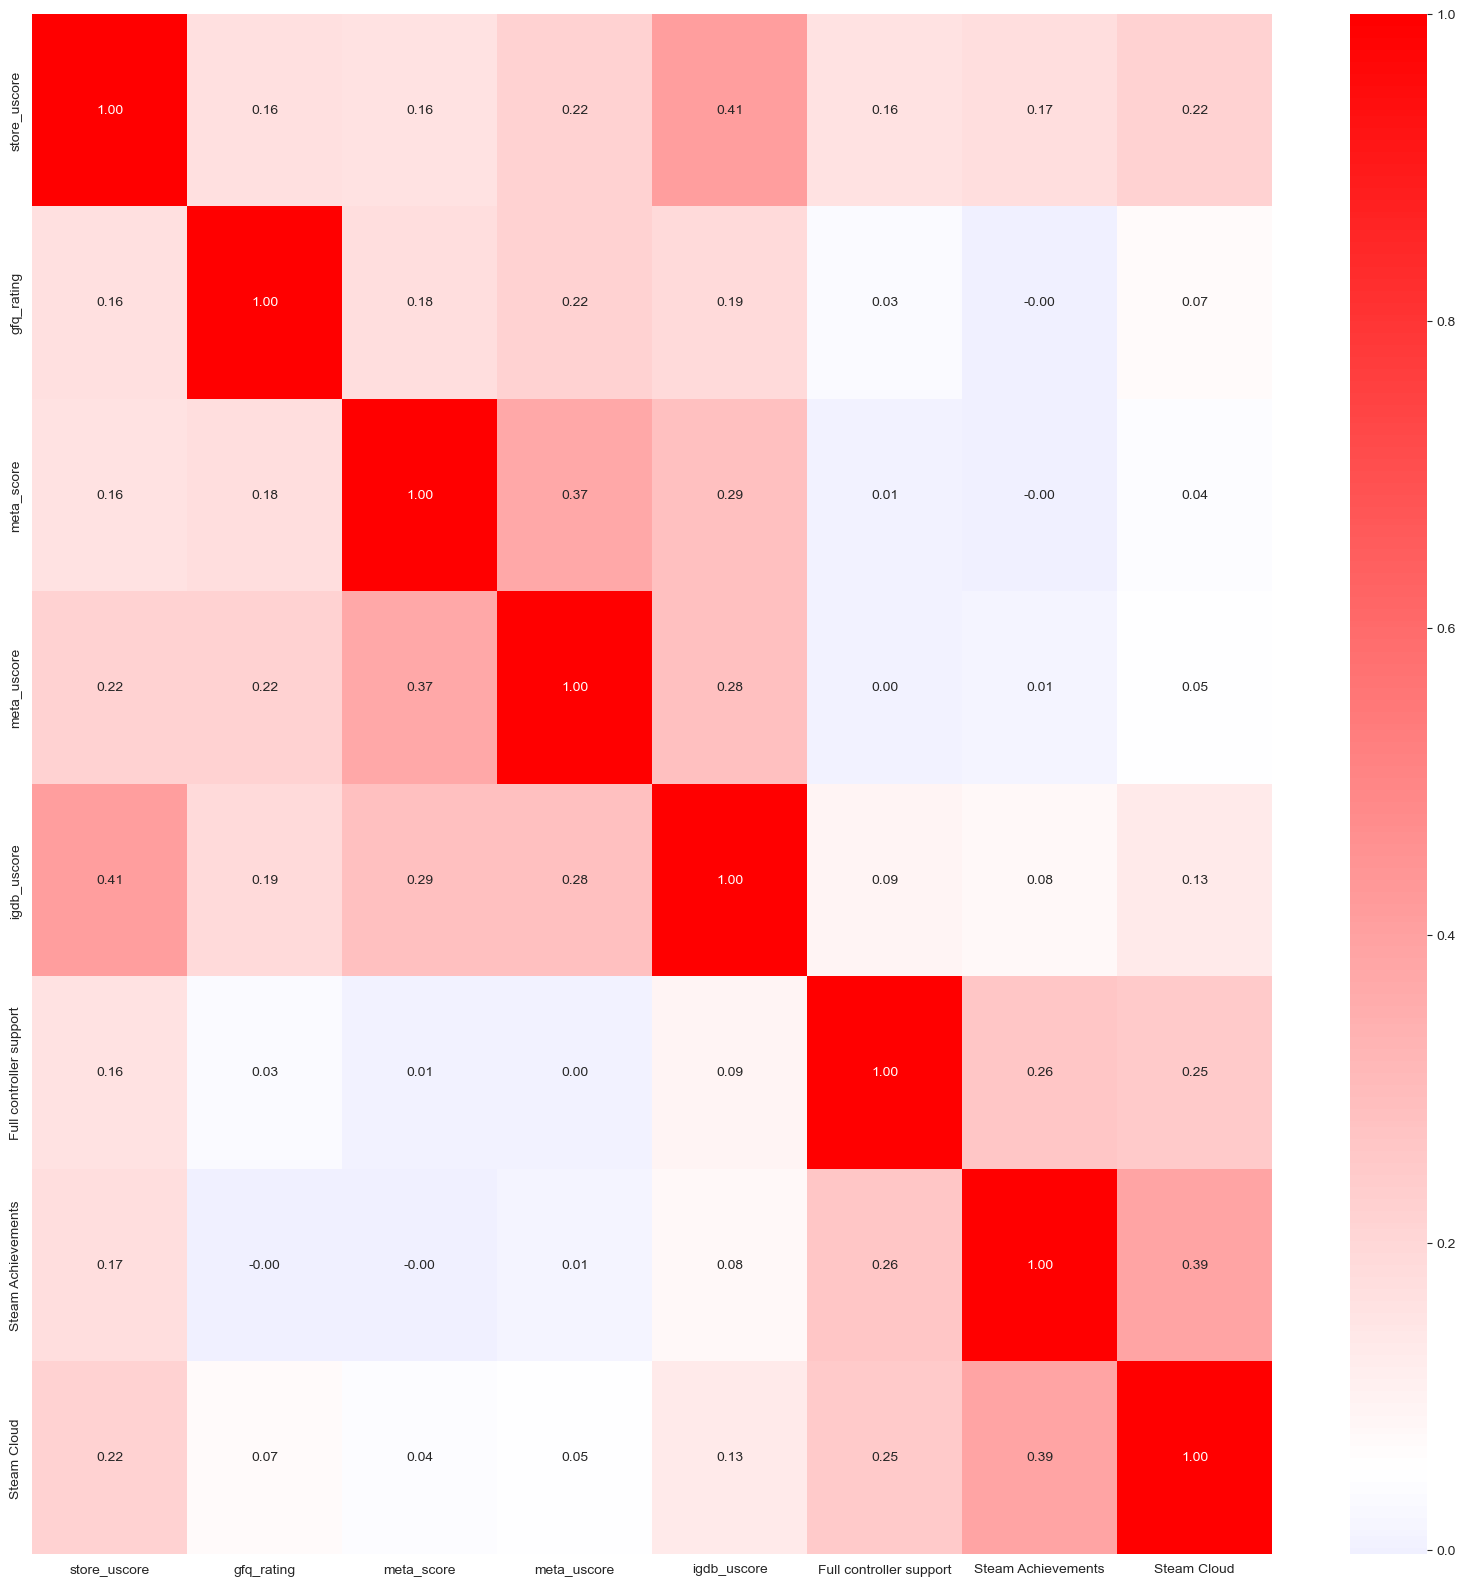

In [50]:
corr_matrix = df_encoded.corr()

# Filtrar colunas com correlação acima de um limiar (0.1 neste caso)
# Verificar primeiro se as colunas estão presentes no DataFrame
cols_to_keep = corr_matrix.columns[corr_matrix.abs()['store_uscore'] > 0.15]

# Criar uma nova matriz de correlação apenas com as colunas filtradas
filtered_corr_matrix = df_encoded[cols_to_keep].corr()

# Usar seaborn para criar um heatmap da matriz de correlação filtrada
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='bwr', center= 0.05)

# Mostrar o gráfico
plt.show()

 Observando a matriz de correlação, está claro que a maioria São fracas e a maior é de 0.41 o que indica que temos que fazer um modelo com várias variáveis independentes para termos sucesso.

#### Regressão linear ou polinomial?

#### Regressão linear simples:
   com a variável de maior correlação

In [51]:
X = df_encoded['igdb_uscore']
y = df_encoded['store_uscore']       # Variável dependente
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           store_uscore   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     5083.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:03:57   Log-Likelihood:            -1.0854e+05
No. Observations:               24930   AIC:                         2.171e+05
Df Residuals:                   24928   BIC:                         2.171e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0314      0.856     14.062      

In [52]:
y_pred = model_sm.predict(X_sm)
Residuos = y - y_pred
shapiro_test = stats.shapiro(Residuos)
print("Shapiro-Wilk Modelo RLS:", shapiro_test)
bp_test = sm.stats.diagnostic.het_breuschpagan(Residuos, model_sm.model.exog)
print("Breusch-Pagan Modelo RLS:", bp_test)

Shapiro-Wilk Modelo RLS: ShapiroResult(statistic=0.9204856753349304, pvalue=0.0)
Breusch-Pagan Modelo RLS: (42.07637103648592, 8.777744189210644e-11, 42.14412551382472, 8.638256363962747e-11)


C:\Users\Lucia\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Não passou em nenhum teste de resíduos. 
Insatisfatório, pode melhorar.

#### Regressão linear com multiplas variáveis:

In [53]:
r_ajustados_modelo = []
f_statistics_modelo  = []
limite = []
residuos_normais = []
for i in range(15):
    corr_matrix = df_encoded.corr(numeric_only=True)
    multi = 0.05 + (0.01 * i)
    limite.append(multi)
    cols_to_keep = corr_matrix.index[corr_matrix.abs()['store_uscore'] > multi]
    cols_to_keep = cols_to_keep.drop('store_uscore')  # Remover a coluna 'score' da lista
    X = df_encoded[cols_to_keep]  # Variáveis independentes
    y = df_encoded['store_uscore']       # Variável dependente
    X_sm = sm.add_constant(X)
    model_sm = sm.OLS(y, X_sm).fit()

    y_pred = model_sm.predict(X_sm)
    Residuos = y - y_pred
    bp_test = sm.stats.diagnostic.het_breuschpagan(Residuos, model_sm.model.exog)
    if bp_test[2] > 0.05:
        residuos_normais.append(multi)

    adj_r_squared = model_sm.rsquared_adj
    f_statistic = model_sm.fvalue

    r_ajustados_modelo.append(adj_r_squared)
    f_statistics_modelo.append(f_statistic)
print('Modelos que passaram no teste de resíduos de pagan:\n')
print(residuos_normais)

Modelos que passaram no teste de resíduos de pagan:

[0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12000000000000001, 0.13, 0.14, 0.15000000000000002, 0.16, 0.16999999999999998, 0.18, 0.19]


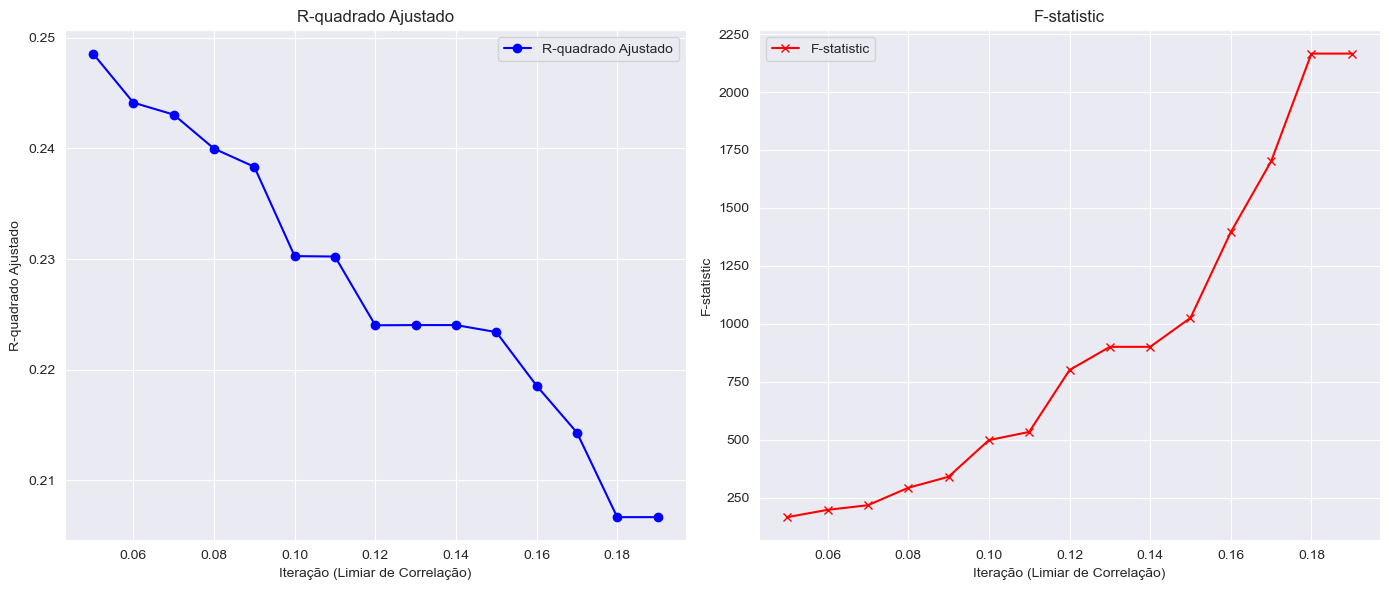

In [54]:
plt.figure(figsize=(14, 6))

# Primeiro subplot para R-quadrado ajustado
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do subplot)
plt.plot(limite,r_ajustados_modelo, label='R-quadrado Ajustado', color='blue', marker='o')
plt.title('R-quadrado Ajustado')
plt.xlabel('Iteração (Limiar de Correlação)')
plt.ylabel('R-quadrado Ajustado')
plt.grid(True)
plt.legend()

# Segundo subplot para F-statistic
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do subplot)
plt.plot(limite,f_statistics_modelo, label='F-statistic', color='red', marker='x')
plt.title('F-statistic')
plt.xlabel('Iteração (Limiar de Correlação)')
plt.ylabel('F-statistic')
plt.grid(True)
plt.legend()

# Ajusta o layout para manter tudo organizado
plt.tight_layout()

# Mostra o gráfico
plt.show()

QQ-PLOT do maior R-ajustado e maior F-statistic

(1504.288702049797, 3.985161716905978e-282, 31.952240973422825, 1.0174466328987217e-291)
                            OLS Regression Results                            
Dep. Variable:           store_uscore   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     165.9
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:05:17   Log-Likelihood:            -1.0727e+05
No. Observations:               24930   AIC:                         2.146e+05
Df Residuals:                   24879   BIC:                         2.151e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

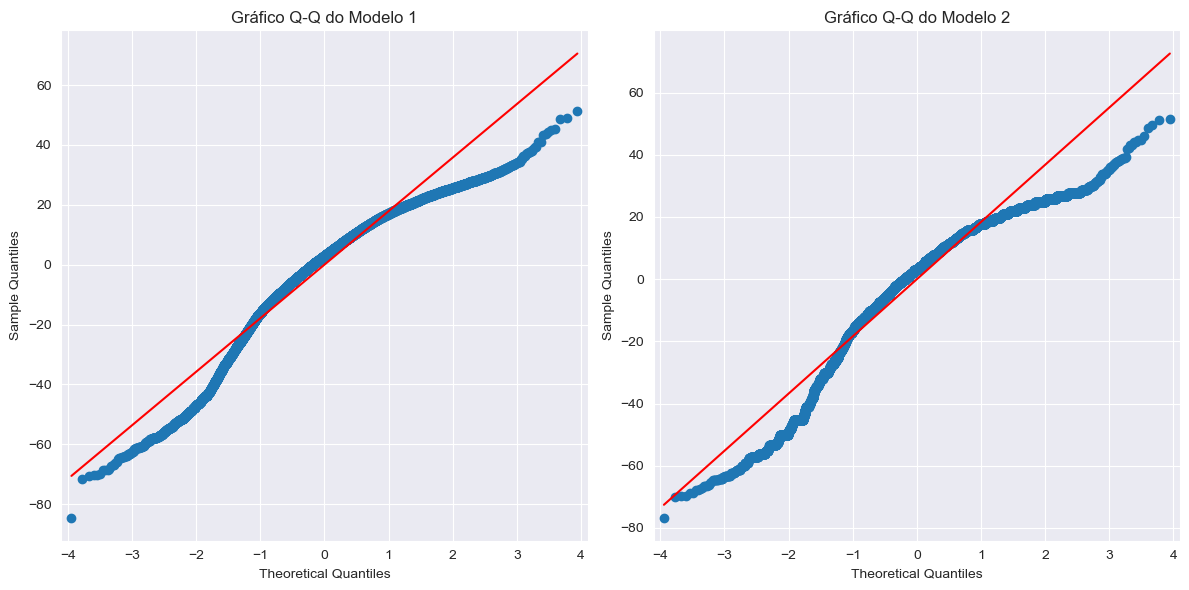

In [55]:
cols_to_keep = corr_matrix.index[corr_matrix.abs()['store_uscore'] > 0.05]
cols_to_keep = cols_to_keep.drop('store_uscore')  # Remover a coluna 'score' da lista
X = df_encoded[cols_to_keep]  # Variáveis independentes
y = df_encoded['store_uscore']       # Variável dependente
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

y_pred = model_sm.predict(X_sm)
Residuos_r_maior = y - y_pred
bp_test = sm.stats.diagnostic.het_breuschpagan(Residuos_r_maior, model_sm.model.exog)

print(bp_test)
print(model_sm.summary())

cols_to_keep = corr_matrix.index[corr_matrix.abs()['store_uscore'] > 0.18]
cols_to_keep = cols_to_keep.drop('store_uscore')  # Remover a coluna 'score' da lista
X = df_encoded[cols_to_keep]     # Variável dependente
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

y_pred = model_sm.predict(X_sm)
Residuos_r_menor = y - y_pred
bp_test = sm.stats.diagnostic.het_breuschpagan(Residuos_r_menor, model_sm.model.exog)

print(bp_test)
print(model_sm.summary())

plt.figure(figsize=(12, 6))

# Gráfico Q-Q para o primeiro modelo
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do subplot)
sm.qqplot(Residuos_r_maior, line='s', ax=plt.gca())
plt.title('Gráfico Q-Q do Modelo 1')

# Gráfico Q-Q para o segundo modelo
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do subplot)
sm.qqplot(Residuos_r_menor, line='s', ax=plt.gca())
plt.title('Gráfico Q-Q do Modelo 2')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

Ainda aparenta um R-ajustado baixo. O modelo explica pouco mesmo com residuos melhorando um pouco com f-stat maior.

#### Regressão Polinomial:

Grau polinomial que passaram no teste de pagan:

[1, 2, 3, 4]


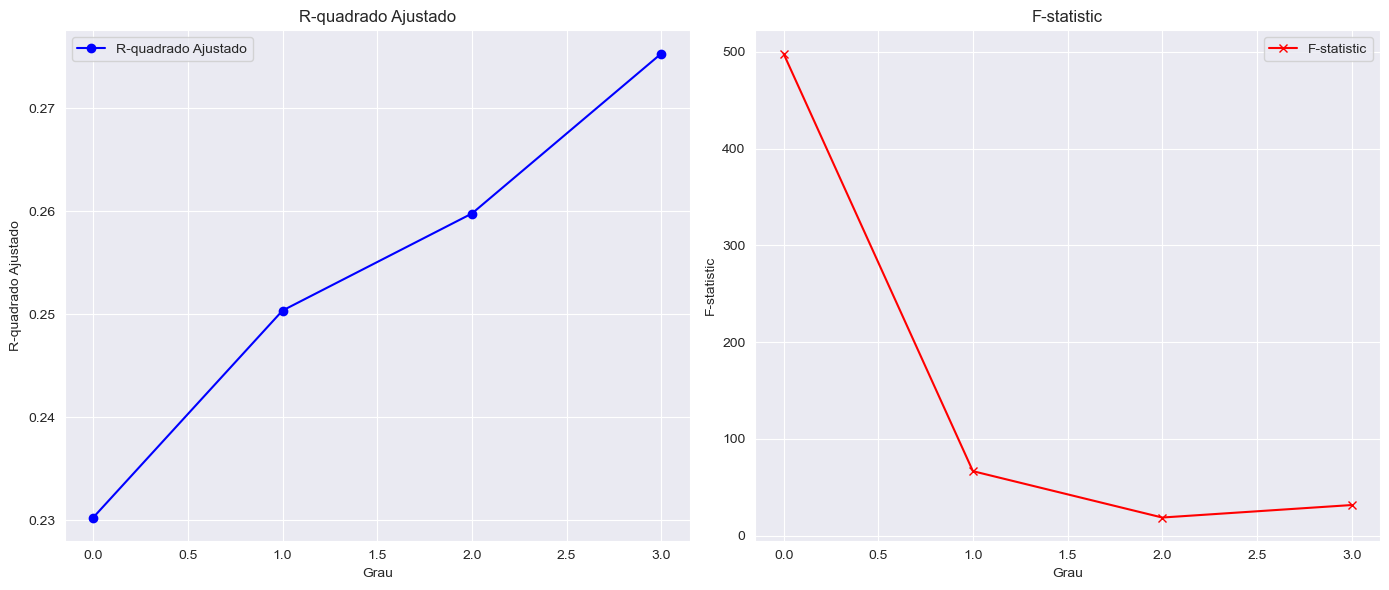

In [57]:
cols_to_keep = corr_matrix.index[corr_matrix.abs()['store_uscore'] > 0.1]
cols_to_keep = cols_to_keep.drop('store_uscore')  # Remover a coluna 'score' da lista
X = df_encoded[cols_to_keep]  # Variáveis independentes
y = df_encoded['store_uscore']

r_ajustados_modelo_poli = []
f_statistics_modelo_poli = []
residuos_normais = []
degrees = [1,2,3,4]
for degree in degrees:  # Graus 1 a 5
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    X_sm_poly = sm.add_constant(X_poly)
    model_sm_poly = sm.OLS(y, X_sm_poly).fit()

    # Extrair R² ajustado e F-statistic
    adj_r_squared = model_sm_poly.rsquared_adj
    f_statistic = model_sm_poly.fvalue
    r_ajustados_modelo_poli.append(adj_r_squared)
    f_statistics_modelo_poli.append(f_statistic)

    y_pred = model_sm_poly.predict(X_sm_poly)
    Residuos = y - y_pred
    bp_test = sm.stats.diagnostic.het_breuschpagan(Residuos, model_sm.model.exog)
    if bp_test[2] > 0.05:
        residuos_normais.append(degree)
print('Grau polinomial que passaram no teste de pagan:\n')
print(residuos_normais)

plt.figure(figsize=(14, 6))

# Primeiro subplot para R-quadrado ajustado
plt.subplot(1, 2, 1)  # (linhas, colunas, índice do subplot)
plt.plot(r_ajustados_modelo_poli, label='R-quadrado Ajustado', color='blue', marker='o')
plt.title('R-quadrado Ajustado')
plt.xlabel('Grau')
plt.ylabel('R-quadrado Ajustado')
plt.grid(True)
plt.legend()

# Segundo subplot para F-statistic
plt.subplot(1, 2, 2)  # (linhas, colunas, índice do subplot)
plt.plot(f_statistics_modelo_poli, label='F-statistic', color='red', marker='x')
plt.title('F-statistic')
plt.xlabel('Grau')
plt.ylabel('F-statistic')
plt.grid(True)
plt.legend()

# Ajusta o layout para manter tudo organizado
plt.tight_layout()

# Mostra o gráfico
plt.show()


(1785.2252578238256, 0.0, 38.379824115084844, 0.0)
                            OLS Regression Results                            
Dep. Variable:           store_uscore   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     31.55
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:06:32   Log-Likelihood:            -1.0669e+05
No. Observations:               24930   AIC:                         2.140e+05
Df Residuals:                   24619   BIC:                         2.165e+05
Df Model:                         310                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

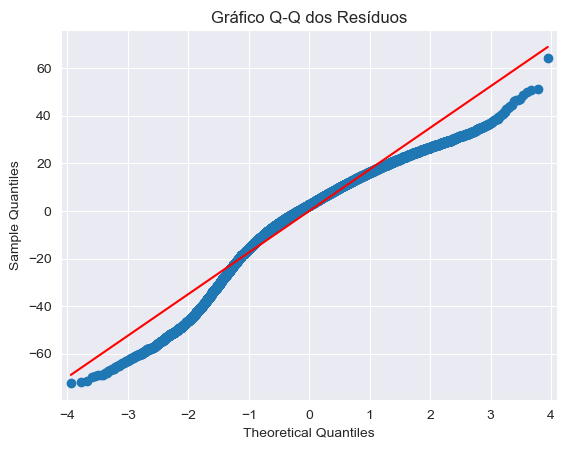

In [58]:
poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X)

X_sm_poly = sm.add_constant(X_poly)
model_sm_poly = sm.OLS(y, X_sm_poly).fit()

y_pred = model_sm_poly.predict(X_sm_poly)
Residuos = y - y_pred
bp_test = sm.stats.diagnostic.het_breuschpagan(Residuos, model_sm.model.exog)
print(bp_test)
print(model_sm_poly.summary())


sm.qqplot(Residuos, line='s')
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

##### Como podemos observar a correlação dos dados são fracas, testados a Regressão linear simples, com variáveis multiplas e polinomial, a polinomial se saiu melhor.<br> já a Regressão linear simples sequer passou nos testes de residuo o que indica heterocedasticidade.